# Kinetics modeling of photooxygenation


The photooxygenation is a function of the concentration in reactants : $[\alpha]$ the concentration in alpha terpinene, $[RB]$ the concentration in bengal rose, $[O_s]$ the concentration in oxygen singulet. This last concentration can be considered as propotionnal to the product of $P_f$ the flux of photon by the specific gas/liquid area, $a$. The specific gas/liquid area, $a$ is proportionnal to $\frac{1}{q+1}$. 

Following these assumptions (to be detailed), the consuption of $[\alpha]$ can be written as : 

$$\frac{d[\alpha]}{dt}=-k_R \frac{[\alpha]^n [RB] P_f}{q+1}$$
where $k_R$ is an apparent reaction constant velocity and n is the order of the reaction. The apparent reaction constant velocity encompass the reaction kinetics, the photon yield and the mass transfert coefficient of oxygen in the liquid phase and the Henry constant. 

The conversion of the $[\alpha]$ is defined as $conv=1- \frac{[\alpha](t)}{[\alpha](t=0)}$


if n=1 :

$$conv=1-e^{-k_R \frac{[RB] P_f}{q+1}t}$$

if n is different to 1 :

$$[\alpha]=([\alpha]_0^{1-n}-(1-n) k_R \frac{[RB] P_f}{q+1}t)^{\frac{1}{1-n}}$$

$$conv = 1-\left( 1 - [\alpha]_0^{n-1}(1-n)k_R \frac{[RB] P_f}{q+1} t  \right)^{\frac{1}{1-n}}$$


Optimization terminated successfully.
kr= [3.91875e-06] 10^(12-3n)*m^(2+3n)/(mol^(1+n))
kr= 39368.38128153448 m5.mol-2
residu: 0.31416165198616447
Effect of the RB concentration


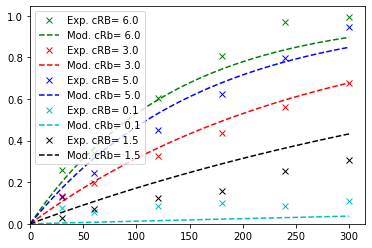

Effect of the colloid polymers


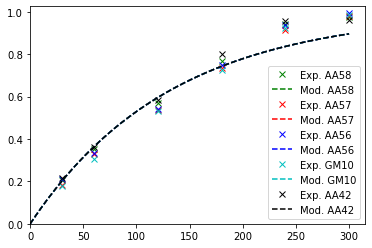

Effect of the photon flux


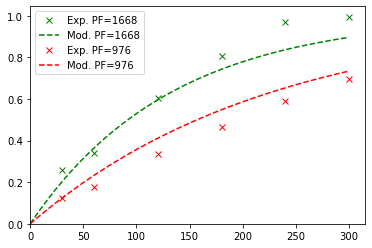

Effect of q


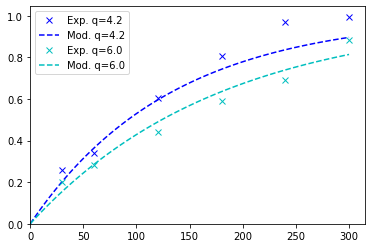

In [20]:
#OPTIMISATION OF THE APPARENT VELOCIT CONSTANT FOR ORDER OF ONE ON ALPHA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading of the Excel file with data (, should be replaced by .) 
df = pd.read_excel('data.xlsx')

t=np.array([30,60,120,180,240,300])
k=6e-6
t0=0
n=0.666

#model for the conversion (reaction order = 1)
def mod(t,k,t0,n,q,cRB,FP,cAL):
    return 1-np.exp(-k*cRB*FP*(t-t0)/(1+q))
    
#function to calculate the exp/mod gap for different parameter k
def min(x):
    k=x[0]
    gap=0
    for i in range(len(df)):
        gapold=gap
        cRB=df.loc[i,'CRB']#micromol.L-1
        #cRB=cRB*1e-6*1000#mol.m-3
        FP=df.loc[i,'FP']#micromol.m-2.s-1
        #FP=FP*1e-6#mol.m-2.s-1
        q=df.loc[i,'q'] 
        cAL=df.loc[i,'Calpha'] #mol.L-1
        #cAL=cAL*1000 #mol.m-3
        gap=sum(np.array([(mod(30,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C30'])**2,(mod(60,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C60'])**2,(mod(120,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C120'])**2,
                    (mod(180,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C180'])**2,(mod(240,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C240'])**2,(mod(300,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C300'])**2]))
        gap=gapold+gap
    return gap
x0=[k]

# minimization of the gap
from scipy.optimize import minimize
res = minimize(min, x0, method='Nelder-Mead')
print(res.message)
print('kr=',res.x ,'10^(12-3n)*m^(2+3n)/(mol^(1+n))')
print('kr=',res.x[0]*10**(12-3*n) ,'m5.mol-2')
print('residu:',min(res.x))
k=res.x[0]

#plot of the results of experimental and modeling results
j=0
colors=('g','r','b','c','k','y','m')
print('Effect of the RB concentration')
for i in range(len(df)):
    if i==0 or i==1 or i==2 or i==8 or i==10 :      
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. cRB= {}".format(cRB))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. cRb= {}".format(cRB))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()
j=0
print('Effect of the colloid polymers')
for i in range(len(df)):
    if i==3 or i==4 or i==5 or i==6 or i==9 :     
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        RB=df.loc[i,'RB']
        FP=df.loc[i,'FP']
        cAL=df.loc[i,'Calpha']
        q=df.loc[i,'q']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. {}".format(RB))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. {}".format(RB))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()
j=0
print('Effect of the photon flux')
for i in range(len(df)):
    if i==0 or i==7 :     
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        RB=df.loc[i,'RB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. PF={}".format(FP))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. PF={}".format(FP))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()

print('Effect of q')
for i in range(len(df)):
    if i==0 or i==12 or i==13 :     
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        RB=df.loc[i,'RB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. q={}".format(q))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. q={}".format(q))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()
  
    

C:\Users\patri\AppData\Local\Temp\ipykernel_2944\4116270617.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return 1-(1-cAL**(n-1)*(1-n)*k*cRB*FP*(t-t0)/(1+q))**(1/(1-n))


Optimization terminated successfully.
[8.77197266e-07 6.30004883e-01]
residu: 0.15668059713284407
kr= 8.771972656249976e-07 10^(12-3n)*m^(2+3n)/(mol^(1+n))
kr= 11300.108690990302  m 3.8900146484374982  mol- 1.6300048828124993
Effect of the RB concentration


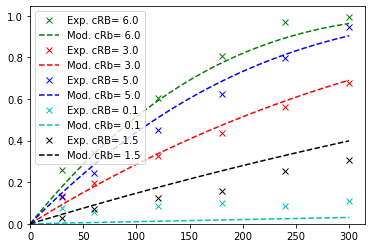

Effect of the colloid polymers


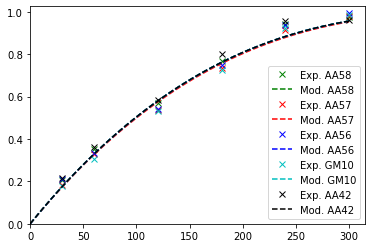

Effect of the photon flux


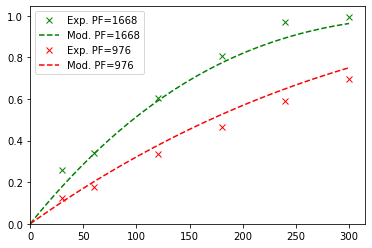

Effect of q


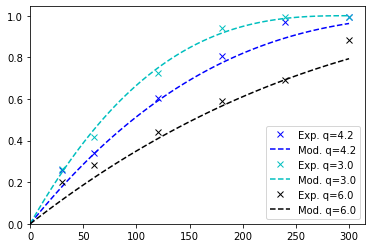

In [7]:
#OPTIMISATION OF THE APPARENT VELOCIT CONSTANT + REACTION ORDER ON ALPHA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading of the Excel file with data (, should be replaced by .) 
df = pd.read_excel('Données brutes manips.xlsx')

t=np.array([30,60,120,180,240,300])
k=1e-6
t0=0
n=0.65

#model for the conversion 
def mod(t,k,t0,n,q,cRB,FP,cAL):
    if n==1 :
        return 1-np.exp(-k*cRB*FP*(t-t0)/(1+q))
    else :
        return 1-(1-cAL**(n-1)*(1-n)*k*cRB*FP*(t-t0)/(1+q))**(1/(1-n))
    
#function to calculate the exp/mod gap for different parameters k and n
def min(x):
    k=x[0]
    #t0=x[1]
    n=x[1]
    gap=0
    for i in range(len(df)):
        gapold=gap
        cRB=df.loc[i,'CRB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        gap=sum(np.array([(mod(30,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C30'])**2,(mod(60,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C60'])**2,(mod(120,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C120'])**2,
                    (mod(180,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C180'])**2,(mod(240,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C240'])**2,(mod(300,k,t0,n,q,cRB,FP,cAL)-0.01*df.loc[i,'C300'])**2]))
        gap=gapold+gap
    return gap
x0=[k,n]
#x0=[k,t0]
#x0=[k,t0,n]
from scipy.optimize import minimize
res = minimize(min, x0, method='Nelder-Mead')
print(res.message)
print(res.x)
print('residu:',min(res.x))
k=res.x[0]
n=res.x[1]
print('kr=',res.x[0] ,'10^(12-3n)*m^(2+3n)/(mol^(1+n))')
print('kr=',res.x[0]*10**(12-3*res.x[1]) ,' m',2+3*res.x[1],' mol-',1+res.x[1])


j=0
colors=('g','r','b','c','k','y','m')
print('Effect of the RB concentration')
for i in range(len(df)):
    if i==0 or i==1 or i==2 or i==8 or i==10 :      
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. cRB= {}".format(cRB))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. cRb= {}".format(cRB))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()
j=0
print('Effect of the colloid polymers')
for i in range(len(df)):
    if i==3 or i==4 or i==5 or i==6 or i==9  :     
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        RB=df.loc[i,'RB']
        FP=df.loc[i,'FP']
        cAL=df.loc[i,'Calpha']
        q=df.loc[i,'q']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. {}".format(RB))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. {}".format(RB))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()
j=0
print('Effect of the photon flux')
for i in range(len(df)):
    if i==0 or i==7 :     
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        RB=df.loc[i,'RB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. PF={}".format(FP))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. PF={}".format(FP))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()

print('Effect of q')
for i in range(len(df)):
    if i==0 or i==11 or i==12 :     
        conv=0.01*np.array([df.loc[i,'C30'],df.loc[i,'C60'],df.loc[i,'C120'],df.loc[i,'C180'],df.loc[i,'C240'],df.loc[i,'C300']])
        cRB=df.loc[i,'CRB']
        RB=df.loc[i,'RB']
        FP=df.loc[i,'FP']
        q=df.loc[i,'q']
        cAL=df.loc[i,'Calpha']
        modele=np.array([mod(30,k,t0,n,q,cRB,FP,cAL),mod(60,k,t0,n,q,cRB,FP,cAL),mod(120,k,t0,n,q,cRB,FP,cAL),mod(180,k,t0,n,q,cRB,FP,cAL),mod(240,k,t0,n,q,cRB,FP,cAL),mod(300,k,t0,n,q,cRB,FP,cAL)])
        tmod=np.linspace(0,300,100)
        plt.plot(t,conv,'x',color=colors[j],label="Exp. q={}".format(q))
        plt.plot(tmod,mod(tmod,k,t0,n,q,cRB,FP,cAL),'--',color=colors[j],label="Mod. q={}".format(q))
        plt.xlim(0,)
        plt.ylim(0,)
        plt.legend()
        j+=1
plt.show()
  